In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def clean_df(df):
    df = df[df.caption != '']
    return df.reset_index(drop=True)

In [3]:
rev_dpath = '../data/outputs/reviews/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rev = pd.DataFrame()
for file in rev_files:
    
    df = pd.read_json(file)
    df_clean = clean_df(df)
    df_clean['place_id'] = file.split('_',1)[1]
    df_rev = pd.concat((df_rev, df_clean), ignore_index=True)

In [4]:
df_rev['place_id'] = df_rev['place_id'].str.replace('.json','')

In [5]:
rev_dpath = '../data/outputs/cbg_restaurants/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rest = pd.DataFrame()
for file in rev_files[:725]:
    
    df = pd.read_json(file)

    df_rest = pd.concat((df_rest, df), ignore_index=True)

In [6]:
df_join = df_rest.join(df_rev.set_index('place_id'),on = 'place_id',lsuffix='_rest', how='inner')

In [180]:
def binary_class_rev(rating):
    if rating ==2:
        return 1
    else:
        return 0

In [7]:
df_prep = df_join.drop_duplicates(subset = ['id_review'], keep='first')
df_prep['rev_length'] = df_prep.caption.str.len()
df_prep = df_prep[df_prep.rev_length>25]
# df_prep['rating_cat'] = df_prep['rating'].apply(lambda x: binary_class_rev(x))
df_prep

C:\Users\swami\Anaconda3\envs\base_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,business_status,geometry,icon,name,opening_hours,photos,place_id,plus_code,reference,scope,...,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,census_block_group,rev_length
1,OPERATIONAL,"{'location': {'lat': 33.5206608, 'lng': -86.80...",https://maps.gstatic.com/mapfiles/place_api/ic...,Restaurants,None,"[{'height': 1280, 'html_attributions': ['<a hr...",ChIJNe0mPMkbiYgR6oApk2Pt7F8,"{'compound_code': 'G5CX+72 Birmingham, AL, USA...",ChIJNe0mPMkbiYgR6oApk2Pt7F8,GOOGLE,...,Money to pawy secy y QPRyiy,2 years ago,2021-03-23,1,Prathamesh Adhikari,1,0,https://www.google.com/maps/contrib/1146220333...,10730027002,27
2,OPERATIONAL,"{'location': {'lat': 32.6146592, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,The Cup and Saucer Casseroles Catering & More,{'open_now': False},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,GOOGLE,...,Delicious food all the way around! Cup and Sau...,7 months ago,2021-03-23,5,Melissa Atkinson,0,0,https://www.google.com/maps/contrib/1127619209...,10810402004,368
2,OPERATIONAL,"{'location': {'lat': 32.6146592, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,The Cup and Saucer Casseroles Catering & More,{'open_now': False},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,GOOGLE,...,"Great frozen homemade casseroles, refrigerated...",2 years ago,2021-03-23,5,Tana Branch,0,0,https://www.google.com/maps/contrib/1084704427...,10810402004,214
3,OPERATIONAL,"{'location': {'lat': 32.6146842, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,Yum Yums Food Specialty Shoppe and Grocery,{'open_now': False},"[{'height': 640, 'html_attributions': ['<a hre...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,GOOGLE,...,We had the food for a work event and it was ve...,a year ago,2021-03-23,5,Liv Laugh BTS,6,0,https://www.google.com/maps/contrib/1010388976...,10810402004,164
3,OPERATIONAL,"{'location': {'lat': 32.6146842, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,Yum Yums Food Specialty Shoppe and Grocery,{'open_now': False},"[{'height': 640, 'html_attributions': ['<a hre...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,GOOGLE,...,Food is great ad well as service.,2 years ago,2021-03-23,4,Carol Lisenby,0,0,https://www.google.com/maps/contrib/1171812312...,10810402004,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,OPERATIONAL,"{'location': {'lat': 41.7787247, 'lng': -87.60...",https://maps.gstatic.com/mapfiles/place_api/ic...,JB One,{'open_now': False},"[{'height': 440, 'html_attributions': ['<a hre...",ChIJk-4M8SYpDogRCnAu8VxVSYE,"{'compound_code': 'Q9HV+FQ Chicago, IL, USA', ...",ChIJk-4M8SYpDogRCnAu8VxVSYE,GOOGLE,...,I order the two cheese burger specials with ch...,4 years ago,2021-03-28,4,D!or & Derek The Osborns,5,0,https://www.google.com/maps/contrib/1024391676...,170314208001,132
5031,OPERATIONAL,"{'location': {'lat': 41.7787247, 'lng': -87.60...",https://maps.gstatic.com/mapfiles/place_api/ic...,JB One,{'open_now': False},"[{'height': 440, 'html_attributions': ['<a hre...",ChIJk-4M8SYpDogRCnAu8VxVSYE,"{'compound_code': 'Q9HV+FQ Chicago, IL, USA', ...",ChIJk-4M8SYpDogRCnAu8VxVSYE,GOOGLE,...,"Very terrible service, i literally just left ...",5 years ago,2021-03-28,1,Arniitia Glenn,1,0,https://www.google.com/maps/contrib/1153773321...,170314208001,719
5031,OPERATIONAL,"{'location': {'lat': 41.7787247, 'lng': -87.60...",https://maps.gstatic.com/mapfiles/place_api/ic...,JB One,{'open_now': False},"[{'height': 440, 'html_attributions': ['<a hre...",ChIJk-4M8SYpDogRCnAu8VxVSYE,"{'compound_code': 'Q9HV+FQ Ch

In [9]:
from scipy.stats import pointbiserialr

pointbiserialr(df_prep['rating'].values, df_prep['rev_length'].values)

PointbiserialrResult(correlation=-0.22246294391448096, pvalue=0.0)

In [10]:
df_prep[['rating','price_level','rev_length']].corr()

,rating,price_level,rev_length
rating,1.000000,0.093842,-0.222463
price_level,0.093842,1.000000,0.076464
rev_length,-0.222463,0.076464,1.000000


In [141]:
df_rest[df_rest.place_id=='ChIJCezJA4ptAHwRd5CueyvT0iw']['name']

2344    Crackin' Kitchen
2372    Crackin' Kitchen
Name: name, dtype: object

In [145]:
df_rest[df_rest['name'].str.contains('McD')]

,business_status,geometry,icon,name,opening_hours,photos,place_id,plus_code,reference,scope,types,vicinity,rating,user_ratings_total,CBG,Radius,price_level,permanently_closed
77,OPERATIONAL,"{'location': {'lat': 38.924242, 'lng': -77.052...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJu-yDctS3t4kROm9YRVn68Z0,"{'compound_code': 'WWFX+M4 Washington, DC, USA...",ChIJu-yDctS3t4kROm9YRVn68Z0,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","2616 Connecticut Avenue Northwest, Washington",3.6,615.0,110010005012,317.192984,1.0,NaN
86,OPERATIONAL,"{'location': {'lat': 38.9805749, 'lng': -77.02...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 3464, 'html_attributions': ['<a hr...",ChIJdZIaE5HIt4kRW5cZY10GZds,"{'compound_code': 'XXJF+6F Washington, DC, USA...",ChIJdZIaE5HIt4kRW5cZY10GZds,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","7425 Georgia Avenue Northwest, Washington",3.7,900.0,110010016002,248.166470,1.0,NaN
274,OPERATIONAL,"{'location': {'lat': 38.9205904, 'lng': -77.02...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 2576, 'html_attributions': ['<a hr...",ChIJmzXuUuO3t4kRr7FLUsl4K04,"{'compound_code': 'WXCH+63 Washington, DC, USA...",ChIJmzXuUuO3t4kRr7FLUsl4K04,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","2328 Georgia Avenue Northwest, Washington",3.5,1490.0,110010035002,286.597757,1.0,NaN
638,OPERATIONAL,"{'location': {'lat': 38.9119836, 'lng': -77.03...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 1080, 'html_attributions': ['<a hr...",ChIJ7ZpZ6Oe3t4kRxd2lGfr4Gk4,"{'compound_code': 'WX66+QQ Washington, DC, USA...",ChIJ7ZpZ6Oe3t4kRxd2lGfr4Gk4,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","1619 17th Street Northwest, Washington",3.8,548.0,110010053014,147.479200,1.0,NaN
768,OPERATIONAL,"{'location': {'lat': 38.89705, 'lng': -77.0293...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 814, 'html_attributions': ['<a hre...",ChIJO3N1FJe3t4kRHZL4qzkdwjQ,"{'compound_code': 'VXWC+R7 Washington, DC, USA...",ChIJO3N1FJe3t4kRHZL4qzkdwjQ,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","555 13th Street Northwest, Washington",3.9,1242.0,110010058001,465.784547,1.0,NaN
790,OPERATIONAL,"{'location': {'lat': 38.900598, 'lng': -77.029...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 3120, 'html_attributions': ['<a hr...",ChIJzd4oJ5S3t4kRdOWbVWMM-6Y,"{'compound_code': 'WX2C+67 Washington, DC, USA...",ChIJzd4oJ5S3t4kRdOWbVWMM-6Y,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","1235 New York Avenue Northwest, Washington",3.6,1446.0,110010058001,465.784547,1.0,NaN
849,OPERATIONAL,"{'location': {'lat': 38.898587, 'lng': -77.021...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 1712, 'html_attributions': ['<a hr...",ChIJD4OEHo63t4kR-jqq6XgQ3EU,"{'compound_code': 'VXXH+C9 Washington, DC, USA...",ChIJD4OEHo63t4kR-jqq6XgQ3EU,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","601 F Street Northwest, Washington",3.2,729.0,110010058002,272.305505,1.0,NaN
969,OPERATIONAL,"{'location': {'lat': 38.89926, 'lng': -76.9802...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 768, 'html_attributions': ['<a hre...",ChIJ7TScDUK4t4kRsvPxDLDr9f0,"{'compound_code': 'V2X9+PW Washington, DC, USA...",ChIJ7TScDUK4t4kRsvPxDLDr9f0,GOOGLE,"[cafe, restaurant, food, point_of_interest, st...","1635 Benning Road Northeast, Washington",3.4,886.0,110010079014,198.946239,1.0,NaN
1063,OPERATIONAL,"{'location': {'lat': 38.900598, 'lng': -77.029...",https://maps.gstatic.com/mapfiles/place_api/ic...,McDonald's,{'open_now': True},"[{'height': 3120, 'html_attributions': ['<a hr...",ChIJzd4oJ5

In [13]:
import seaborn as sns

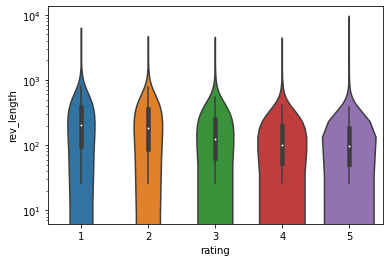

In [16]:
sns.violinplot(x= 'rating', y = 'rev_length', data=df_prep,saturation=0.75,bw=0.8)
plt.yscale('log')

In [164]:
df_join[df_join.rev_length < 35]['caption']

1             Money to pawy secy y QPRyiy
3       Food is great ad well as service.
4                  Everything is Amazing!
4              Quick service, tasty food.
4              Food and service were fair
                      ...                
3411                            Great bar
3411                 Awesome Michigan bar
3411    Decent divey bar with great logo.
3411                          Great deals
3411                            LOVE them
Name: caption, Length: 83355, dtype: object

In [163]:
len(df_join)

382994